In [5]:
from wordcloud import WordCloud, STOPWORDS

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
import re
import networkx as nx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/800017409/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
consumer_key= 'QCsJRV19sJISZGgf6nejueRSa'
consumer_secret= 'dIHax7H9JilXKd6NhfN4upwVtVdzpflRH0KEeJZ3PLX1czRRI3'
access_token= '56790330-R1bjHJyD0mnyM3KC4AsoJMLF6Zp2pPKrnF72TkjUq'
access_token_secret= 'kefXSwJh22Dn3diySnF9kohWbPCgtjo9wDEwuTCTV4LXF'

In [7]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [8]:
# The Twitter API only allows you to access the past few weeks of tweets unless you purchase the premium API


search_term = "#federalreserve -filter:retweets"
date_since = "2019-11-30"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since=date_since).items(500)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:50]

['New York #FederalReserve Bank President John Williams did not comment on the U.S. economic or monetary policy outlo… https://t.co/CmMiOGLNWu',
 '#FederalReserve: Federal Reserve Board announces members of its Community Depository Institutions Advisory Council… https://t.co/fHCG6MZ08b',
 'How do I go about getting money from the #FederalReserve the way banks (and soon to be hedge funds) can? What a freaking racket...',
 '#FederalReserve Board announces members of its Community Depository Institutions Advisory Council for 2020\nhttps://t.co/kTlO4DPRDh #Fed',
 'While stocks continue to perform, there are risks out there, particularly if the Fed drains abandons its repo opera… https://t.co/jz48eVXVAw',
 "Why do we even HAVE commercial banks? Just hand all the world's business over to the Hive and have done with.\nPS: W… https://t.co/afGIlI75Is",
 'Testing the Waters: Investors Ease Into Earnings Season As Banks Results Mixed https://t.co/LtKqRffMzo\n\n#earnings… https://t.co/9DGoOA9tAT',

In [9]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]


In [10]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['new',
  'york',
  'federalreserve',
  'bank',
  'president',
  'john',
  'williams',
  'did',
  'not',
  'comment',
  'on',
  'the',
  'us',
  'economic',
  'or',
  'monetary',
  'policy',
  'outlo'],
 ['federalreserve',
  'federal',
  'reserve',
  'board',
  'announces',
  'members',
  'of',
  'its',
  'community',
  'depository',
  'institutions',
  'advisory',
  'council']]

In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [13]:
# Create a counter to return the most commonly used words and the number of times that they are used.
all_words_nsw = list(itertools.chain(*tweets_nsw))
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('federalreserve', 152),
 ('fed', 56),
 ('federal', 50),
 ('reserve', 45),
 ('us', 21),
 ('bank', 20),
 ('money', 19),
 ('economy', 19),
 ('history', 16),
 ('treasury', 15),
 ('banks', 14),
 ('video', 14),
 ('heres', 14),
 ('familiar', 13),
 ('quick', 13)]

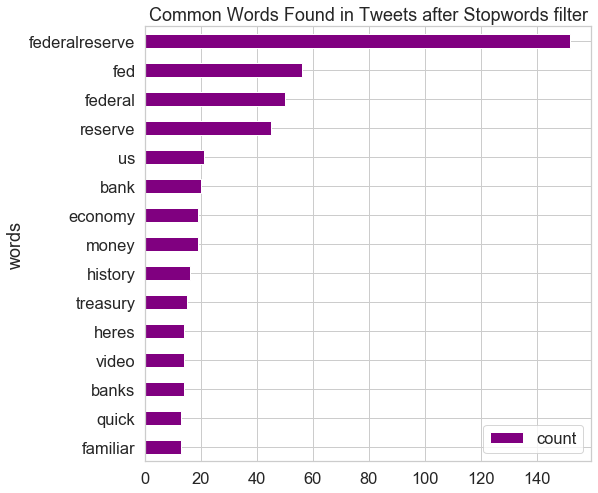

In [14]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets after Stopwords filter")

plt.show()

In [15]:
# Remove collection words. Collection words are the words that you used to query your data from Twitter. 
# This This could skew your word frequency analysis.

collection_words = ['#federalreserve', 'federalreserve', 'fed','reserve', 'federal','us']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [16]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('bank', 20),
 ('money', 19),
 ('economy', 19),
 ('history', 16),
 ('treasury', 15),
 ('banks', 14),
 ('video', 14),
 ('heres', 14),
 ('familiar', 13),
 ('quick', 13),
 ('fedpolicy', 13),
 ('repo', 12),
 ('market', 12),
 ('investing', 12),
 ('trillion', 12)]

In [17]:
# Gives count of unique tweet words
len(counts_nsw_nc)

1452

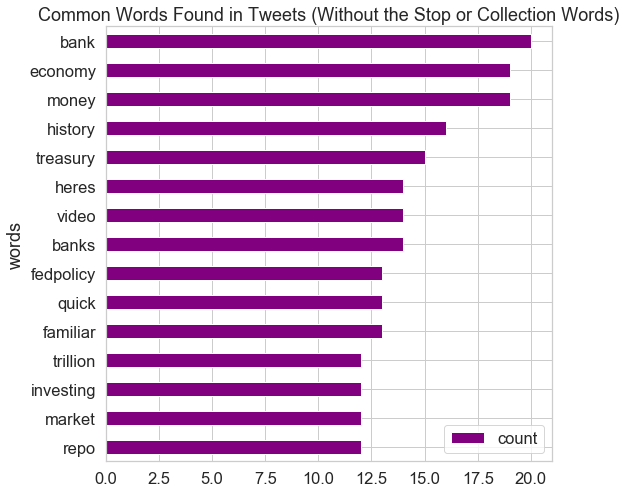

In [18]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without the Stop or Collection Words)")

plt.show()

In [19]:
# Bigrams


# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('video', 'familiar'), 13),
 (('familiar', 'heres'), 13),
 (('heres', 'quick'), 13),
 (('quick', 'history'), 13),
 (('history', 'fedpolicy'), 13),
 (('secrets', 'temple'), 11),
 (('temple', 'works'), 11),
 (('pujamehra', 'centreforpolicyresearchcdsbath'), 10),
 (('centreforpolicyresearchcdsbath', 'lehmanbrothers'), 10),
 (('lehmanbrothers', 'merrilllynch'), 10),
 (('lost', 'decadethelostdecade'), 9),
 (('decadethelostdecade', 'pujamehra'), 9),
 (('monetary', 'policy'), 8),
 (('6', 'trillion'), 8),
 (('bond', 'report'), 7),
 (('net', 'lease'), 6),
 (('report', 'treasury'), 6),
 (('treasury', 'yields'), 6),
 (('admits', 'pumped'), 6),
 (('pumped', '6'), 6)]

In [20]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])


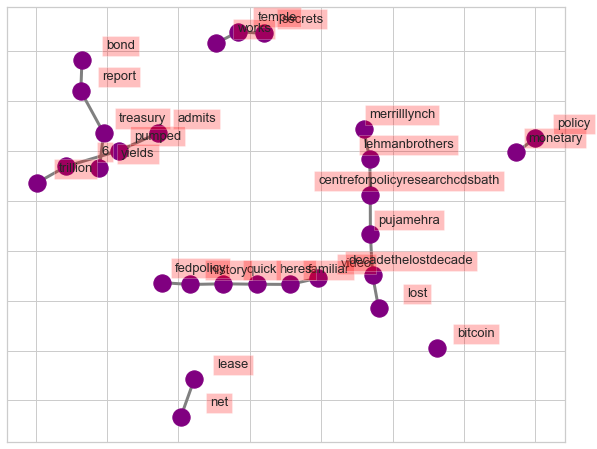

In [21]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("bitcoin", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

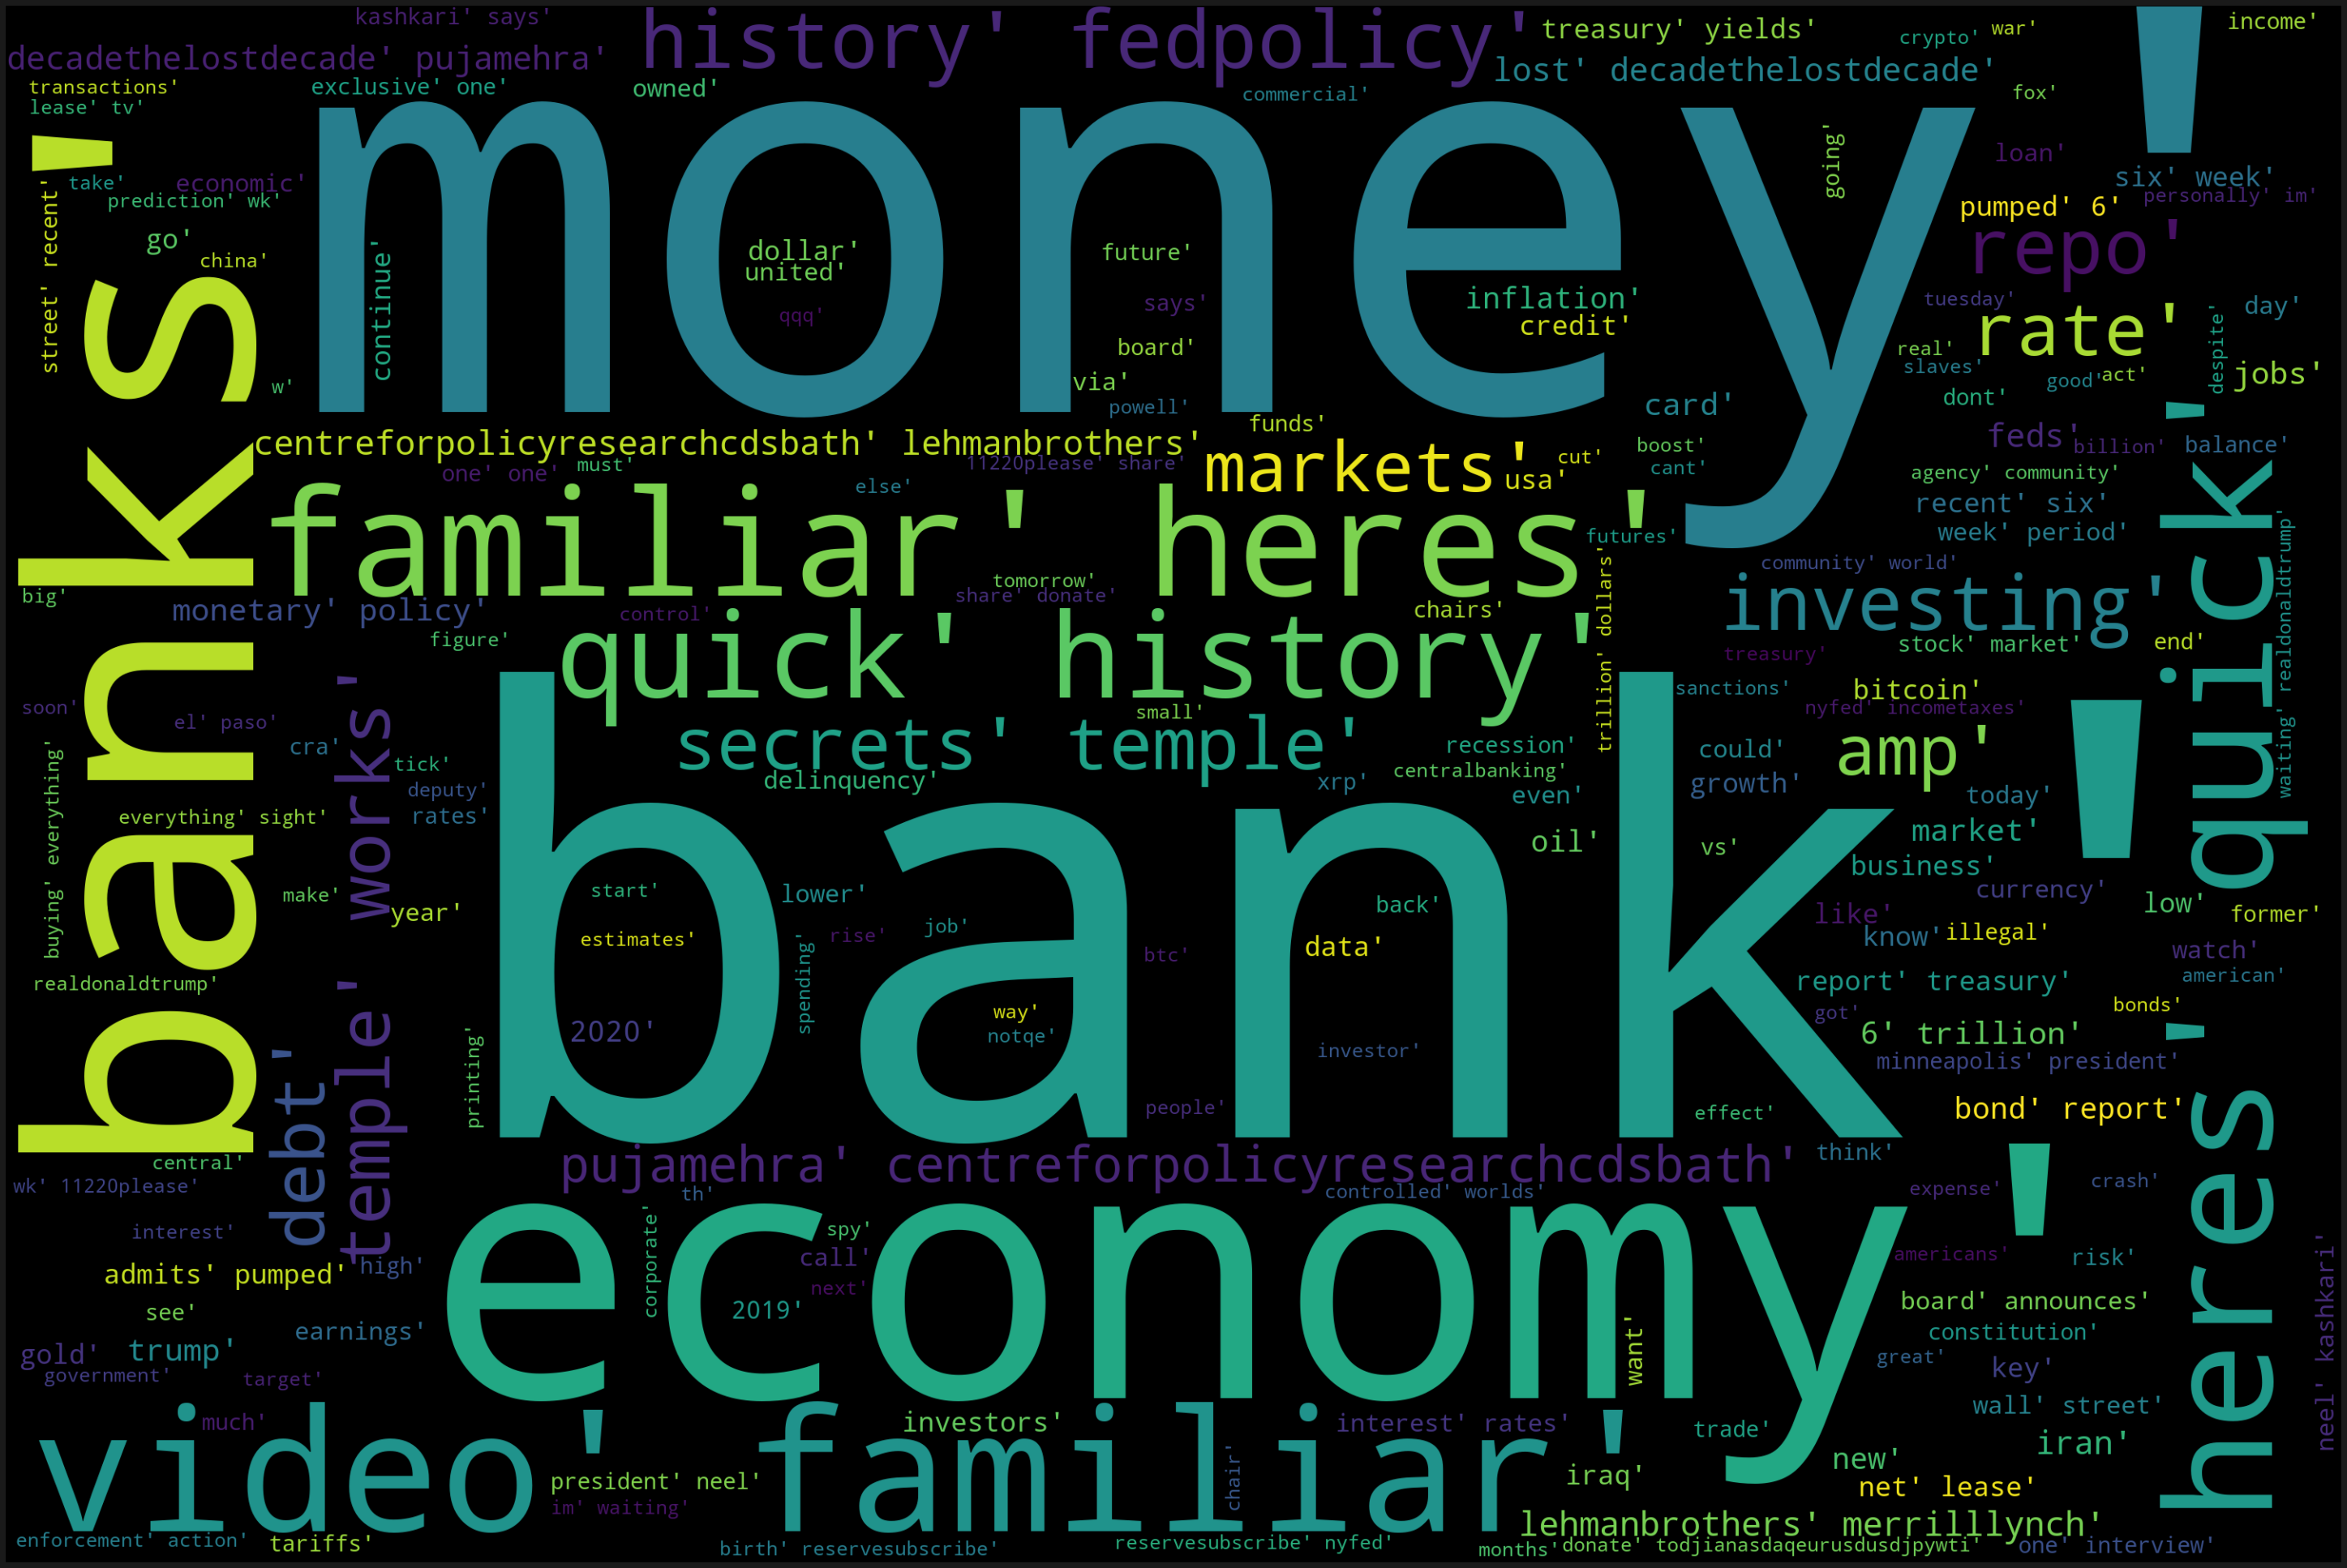

In [22]:

text = all_words_nsw_nc
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()